In [1]:
#الرسم والnumpy and pandas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px




#Tokenization
from nltk.tokenize import word_tokenize
import nltk#nlp
import re#regular expressions





#wordcloud
from wordcloud import WordCloud







#تتعامل مع النصوص مثلا تحذف  علامات الترقيم أو تحويل الأحرف
import string
from nltk.corpus import stopwords
nltk.download('punkt')#تقيم الكلمات
nltk.download('stopwords')# تحذ الكلمات الي مو مهمه
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer# ترجع الكلمه للاساسها



stop_words = stopwords.words()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
txt = pd.read_csv('/content/Reviews.csv')
txt.head()
txt.info()
txt.describe()



txt.isna().sum().to_frame(name='# of missing values')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


,# of missing values
Id,0
ProductId,0
UserId,0
ProfileName,26
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,27
Text,0


In [3]:
 #حذف الصفوف التي تحتوي على miss
initial_row_count = txt.shape[0]#عدد الصفوف الحقيقه


txt = txt.dropna()# يحذف الي فيها missing value


final_row_count = txt.shape[0] #الصفوف المتبقيه


# عدد الصفوف  الي  حذفتها
rows_removed = initial_row_count - final_row_count
print(f"Number of rows removed: {rows_removed}")# عدد الصفوف  الي  حذفتها


print(f"Initial number of rows: {initial_row_count}")#الاصليه
print(f"Final number of rows: {final_row_count}")#بعد حذف

Number of rows removed: 53
Initial number of rows: 568454
Final number of rows: 568401


In [4]:
# حساب عدد الصفوف الأصلي قبل إزالة التكرارات
initial_row_count = txt.shape[0]

# إزالة الصفوف المكررة بناءً على الأعمدة 'Score' و 'Text'
txt = txt.drop_duplicates(subset=['Score', 'Text'])

# حساب عدد الصفوف المتبقية بعد إزالة التكرارات
final_row_count = txt.shape[0]

# حساب عدد الصفوف التي تمت إزالتها بسبب التكرار
rows_removed = initial_row_count - final_row_count

# طباعة عدد الصفوف التي تمت إزالتها
print(f"Number of rows removed: {rows_removed}")
print(f"Initial number of rows: {initial_row_count}")
print(f"Final number of rows: {final_row_count}")


Number of rows removed: 174745
Initial number of rows: 568401
Final number of rows: 393656


In [5]:
unique_scores = txt['Score'].unique()
print("Unique values in the 'Score' column:", unique_scores)

Unique values in the 'Score' column: [5 1 4 2 3]


In [6]:
conditions = [
    (txt['Score'] > 3),
    ( txt['Score'] == 3),
    (txt['Score'] < 3)
]
choices = ['Positive', 'Neutral', 'Negative']

# إنشاء عمود الهدف
txt['target'] = np.select(conditions, choices)



txt[['Score', 'target']].sample(20)

,Score,target
199486,5,Positive
135989,3,Neutral
445110,5,Positive
71619,4,Positive
506032,5,Positive
347769,3,Neutral
42167,4,Positive
532170,5,Positive
155934,5,Positive
407998,5,Positive


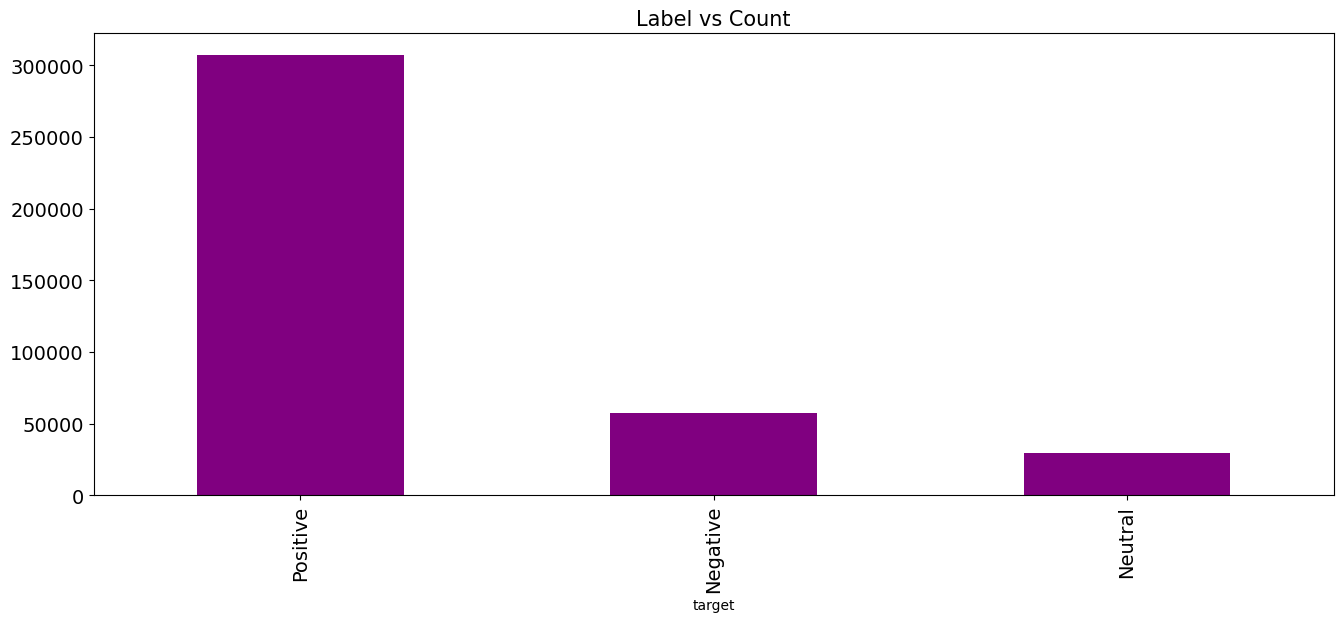

In [7]:
fig, ax = plt.subplots(figsize=(16, 6))

vc = txt.target.value_counts()
vc.plot.bar(color="purple",fontsize=14,ax=ax)
ax.set_title("Label vs Count", fontsize=15)
plt.show()

In [8]:
neutral = txt.loc[txt.target=="Neutral"] # لازم اسوي كذا عشان اوازن بين الالفئات بسبب ان فيها فرق كبير

positive = txt.loc[txt.target=="Positive"].sample(50000)

negative = txt.loc[txt.target=="Negative"].sample(50000)

txt = pd.concat([positive, negative, neutral])
txt.shape

(129770, 11)

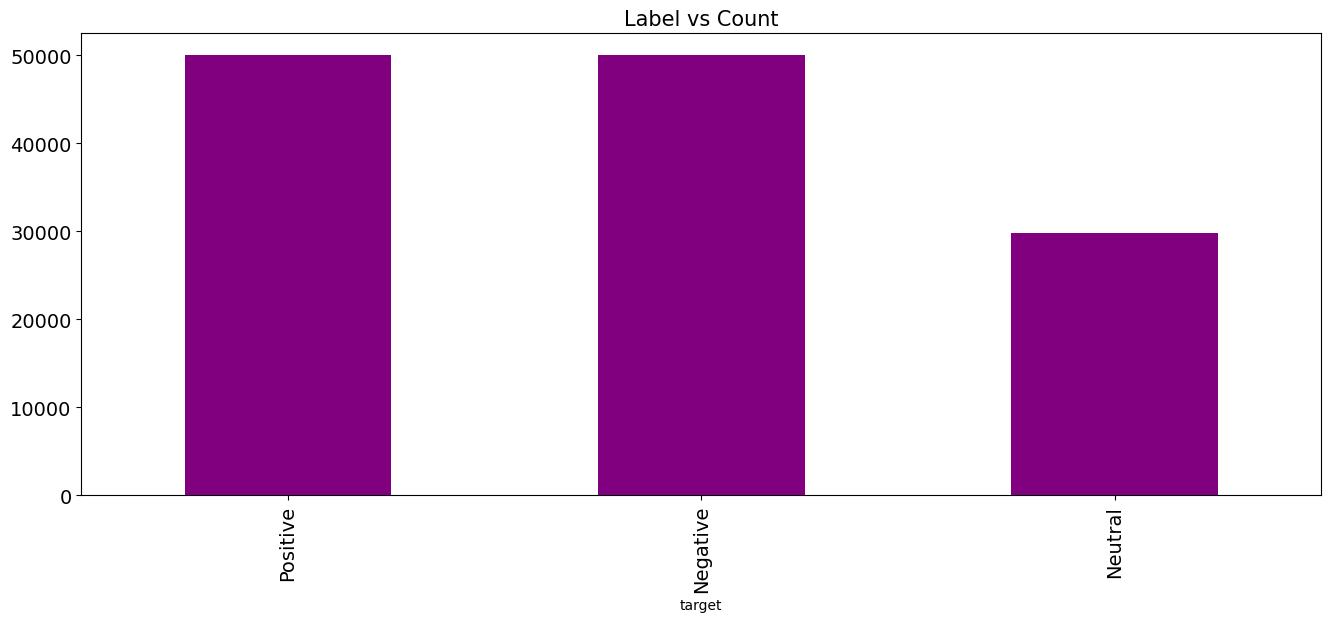

In [9]:
fig, ax = plt.subplots(figsize=(16, 6))

vc = txt.target.value_counts()
vc.plot.bar(color="purple",fontsize=14,ax=ax)
ax.set_title("Label vs Count", fontsize=15)
plt.show()

In [10]:

# تأكد من تنزيل البيانات
nltk.download('punkt')

# إنشاء DataFrame
df = pd.DataFrame(txt)

# تقسيم كل نص في عمود 'Text'
example = df['Text'].apply(word_tokenize)
print(example)

#تخلي كل جمله مقسمه مع بعض في مربع مخصص لها
all_tokens = [token for sublist in example for token in sublist]

#  أول 10
print(all_tokens[:10])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


154161    [If, you, like, a, lotta, brine, ,, then, the,...
168524    [I, have, been, an, avid, senseo, fan, for, ab...
20925     [In, this, cereal, ,, there, are, muligrain, f...
300133    [I, am, so, glad, M, &, M, makes, these, in, d...
509177    [just, what, i, ordered, ,, great, spice, ,, q...
                                ...                        
568336    [These, taste, basically, as, if, there, is, n...
568355    [I, paid, well, over, labeled, price, and, the...
568369    [An, admitted, fan, of, Stash, Earl, Grey, ,, ...
568379    [I, had, n't, tried, this, taco, seasoning, pr...
568422    [This, version, of, Pacific, Chai, is, pretty,...
Name: Text, Length: 129770, dtype: object
['If', 'you', 'like', 'a', 'lotta', 'brine', ',', 'then', 'the', 'folks']


In [11]:
# Data Pre-processing
# stopwords
total_stopwords = set(stopwords.words('english'))

# subtract negative stop words like no, not, don't etc.. from total_stopwords
negative_stop_words = set(word for word in total_stopwords
                          if "n't" in word or 'no' in word)

final_stopwords = total_stopwords - negative_stop_words


final_stopwords.add("one")
print(final_stopwords)

{'yourselves', 'our', 've', 're', 'down', "she's", 'ours', 'on', 'then', 'wasn', 'd', 'where', 'her', 'in', 'shan', 'into', 'before', 'theirs', 'yourself', 'until', 'further', 'under', 'why', 'should', 'their', 'couldn', 'own', 'with', 'against', "that'll", 'between', 'having', 'both', 'same', 'were', 'of', 'any', 'is', 'can', 'be', 'themselves', 'ma', 'we', 'some', 'am', 'do', 'while', 'me', 'what', 'will', 'an', 'your', 'mustn', 'myself', 'each', 'ourselves', 'have', 'too', "you'll", 's', 'one', "you've", 'other', 'shouldn', 'up', 'it', 'did', 't', 'haven', 'as', 'after', 'above', 'has', 'such', 'itself', 'by', 'weren', 'those', 'at', 'herself', 'off', 'only', 'the', 'had', 'doing', "it's", 'hasn', "you're", 'this', 'out', 'from', 'how', 'hadn', 'its', 'are', 'needn', 'and', 'him', 'you', 'so', 'was', 'that', 'don', 'through', 'most', 'them', 'here', 'll', 'if', "should've", 'very', 'wouldn', 'than', 'his', 'does', 'they', 'himself', 'when', 'who', 'isn', 'or', 'again', 'o', 'but', "

In [12]:
#stemming object
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

#يشيل الزيادات ويرجع الكلمه لاصلها
HTMLTAGS = re.compile('<.*?>')
table = str.maketrans(dict.fromkeys(string.punctuation))
remove_digits = str.maketrans('', '', string.digits)
MULTIPLE_WHITESPACE = re.compile(r"\s+")

In [13]:
# Preprocessing function
def preprocessor(review):
    # remove html tags
    review = HTMLTAGS.sub(r'', review)

    # remove puncutuation
    review = review.translate(table)

    # remove digits
    review = review.translate(remove_digits)

    # lower case all letters
    review = review.lower()

    # replace multiple white spaces with single space
    review = MULTIPLE_WHITESPACE.sub(" ", review).strip()

    # remove stop words
    review = [word for word in review.split()
              if word not in final_stopwords]

    # stemming
    review = ' '.join([stemmer.stem(word) for word in review])

    return review

In [14]:
print("Before preprocessing : ")
txt.Text.iloc[6]

Before preprocessing : 


"They are no longer in the supermaket so I have to byu them here. I allways find what I'm looking for in Amazon. thanks!"

In [15]:
txt.Text = txt.Text.apply(preprocessor)
print("After preprocessing : ")
txt.Text.iloc[6]

After preprocessing : 


'no longer supermaket byu allway find im look amazon thank'

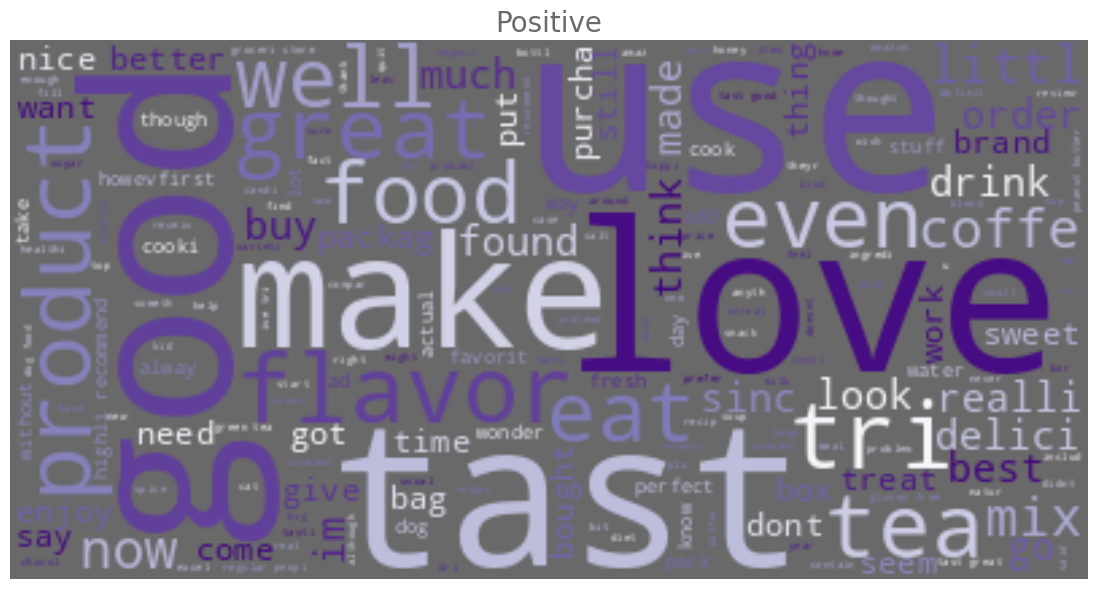

In [16]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def generate_wcloud(text):
    stopwords = set(STOPWORDS)

    # إضافة التدرج البنفسجي باستخدام colormap
    wordcloud = WordCloud(stopwords=stopwords, background_color='dimgray', colormap='Purples')
    wordcloud.generate(text)

    plt.figure(figsize=(15, 7))
    plt.title('Positive', fontsize=20, color='dimgray')  # إضافة العنوان
    plt.axis('off')
    plt.imshow(wordcloud, interpolation='bilinear')
    return plt.show()

# توليد السحابة النصية للتقييمات الإيجابية
pos = txt.loc[txt.target == "Positive"].Text
text = " ".join(review for review in pos.astype(str))

generate_wcloud(text)


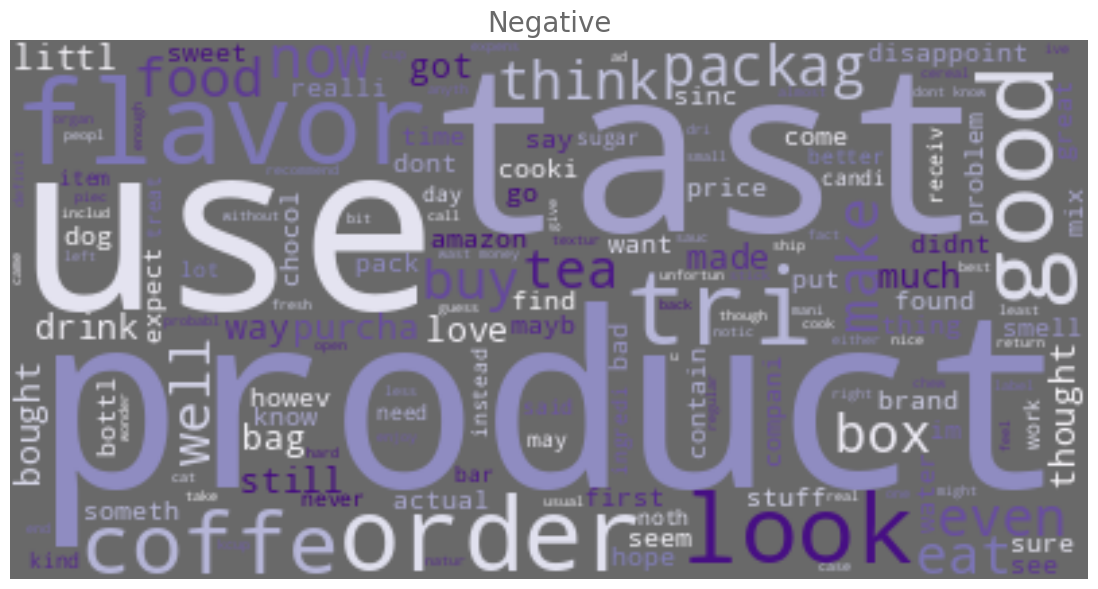

In [17]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def generate_wcloud(text, title):
    stopwords = set(STOPWORDS)

    # إضافة التدرج البنفسجي باستخدام colormap
    wordcloud = WordCloud(stopwords=stopwords, background_color='dimgray', colormap='Purples')
    wordcloud.generate(text)

    plt.figure(figsize=(15, 7))
    plt.title(title, fontsize=20, color='dimgray')  # إضافة العنوان
    plt.axis('off')
    plt.imshow(wordcloud, interpolation='bilinear')
    return plt.show()

# توليد السحابة النصية للتقييمات السلبية
pos = txt.loc[txt.target == "Negative"].Text
text = " ".join(review for review in pos.astype(str))

# توليد السحابة النصية مع إضافة العنوان "Negative"
generate_wcloud(text, title='Negative')


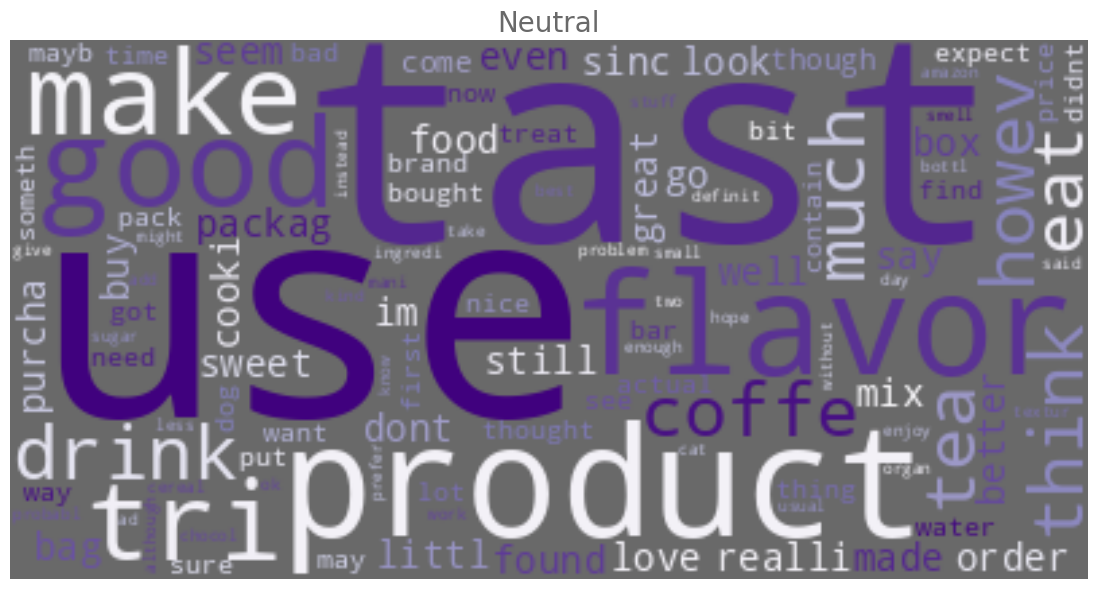

In [18]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def generate_wcloud(text, title):
    stopwords = set(STOPWORDS)

    # إضافة التدرج البنفسجي باستخدام colormap
    wordcloud = WordCloud(stopwords=stopwords, background_color='dimgray', colormap='Purples')
    wordcloud.generate(text)

    plt.figure(figsize=(15, 7))
    plt.title(title, fontsize=20, color='dimgray')  # إضافة العنوان
    plt.axis('off')
    plt.imshow(wordcloud, interpolation='bilinear')
    return plt.show()

# توليد السحابة النصية للتقييمات المحايدة
pos = txt.loc[txt.target == "Neutral"].Text
text = " ".join(review for review in pos.astype(str))

# توليد السحابة النصية مع إضافة العنوان "Neutral"
generate_wcloud(text, title='Neutral')


In [19]:
# Train Test Split
from sklearn.model_selection import train_test_split
X = txt.Text
y = txt.target

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=1, stratify=y)

In [20]:
# Vectorization
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_features=10000)
bow_vectorizer.fit(X_train)

# transform
bow_X_train = bow_vectorizer.transform(X_train)
bow_X_test = bow_vectorizer.transform(X_test)

In [21]:
# Label Encoding¶
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

y_train = labelEncoder.fit_transform(y_train)
y_test = labelEncoder.transform(y_test)

labels = labelEncoder.classes_.tolist()
print(labels) # index-> class

['Negative', 'Neutral', 'Positive']


In [22]:
# Model Training

def train_and_eval(model, trainX, trainY, testX, testY):

    # training
    _ = model.fit(trainX, trainY)

    # predictions
    y_preds_train = model.predict(trainX)
    y_preds_test = model.predict(testX)

    print(model)
    print(f"Train accuracy score : {accuracy_score(y_train, y_preds_train)}")
    print(f"Test accuracy score : {accuracy_score(y_test, y_preds_test)}")
    print('\n',40*'-')

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
# Naive Bayes Classifier with BoW¶
from sklearn.naive_bayes import MultinomialNB
# Define model
nb_model = MultinomialNB()

# Train and evaluate model
train_and_eval(model=nb_model,trainX=bow_X_train,trainY=y_train, testX=bow_X_test,testY=y_test)

MultinomialNB()
Train accuracy score : 0.7083301225244664
Test accuracy score : 0.681397857748324

 ----------------------------------------


In [25]:
# Logistic Regression with BoW¶

# Define model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log_reg_model = LogisticRegression()

# Train and evaluate model
train_and_eval(model=log_reg_model, trainX=bow_X_train,trainY=y_train, testX=bow_X_test,testY=y_test)

LogisticRegression()
Train accuracy score : 0.7739654773830623
Test accuracy score : 0.7041689142328735

 ----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


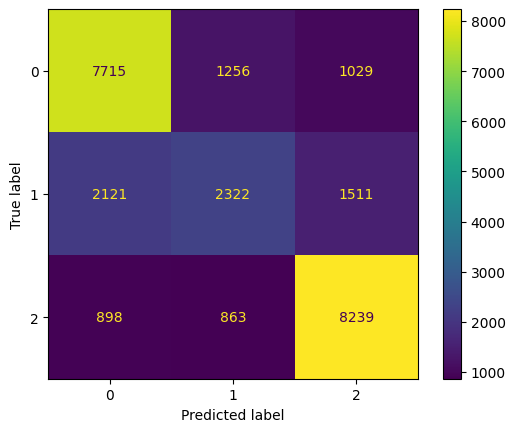

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Define the model
log_reg_model = LogisticRegression()

# Train the model
log_reg_model.fit(bow_X_train, y_train)

# Make predictions
y_pred = log_reg_model.predict(bow_X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm).plot()